In [2]:
import pandas as pd
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [6]:
df= pd.read_csv("ai_job_market_insights.csv" ) 

In [7]:
df

,Job_Title,Industry,Company_Size,Location,AI_Adoption_Level,Automation_Risk,Required_Skills,Salary_USD,Remote_Friendly,Job_Growth_Projection
0,Cybersecurity Analyst,Entertainment,Small,Dubai,Medium,High,UX/UI Design,111392.165243,Yes,Growth
1,Marketing Specialist,Technology,Large,Singapore,Medium,High,Marketing,93792.562466,No,Decline
2,AI Researcher,Technology,Large,Singapore,Medium,High,UX/UI Design,107170.263069,Yes,Growth
3,Sales Manager,Retail,Small,Berlin,Low,High,Project Management,93027.953758,No,Growth
4,Cybersecurity Analyst,Entertainment,Small,Tokyo,Low,Low,JavaScript,87752.922171,Yes,Decline
...,...,...,...,...,...,...,...,...,...,...
495,Data Scientist,Telecommunications,Medium,Berlin,Low,Medium,Machine Learning,105821.394046,Yes,Stable
496,Cybersecurity Analyst,Telecommunications,Small,London,Low,High,UX/UI Design,119794.992146,No,Decline
497,Cybersecurity Analyst,Energy,Large,Dubai,High,Low,UX/UI Design,79644.933099,Yes,Stable
498,Operations Manager,Healthcare,Large,Paris,High,Low,Python,77642.150625,Yes,Stable


In [8]:
df.isna().sum()

Job_Title                0
Industry                 0
Company_Size             0
Location                 0
AI_Adoption_Level        0
Automation_Risk          0
Required_Skills          0
Salary_USD               0
Remote_Friendly          0
Job_Growth_Projection    0
dtype: int64

In [9]:
df.duplicated().sum()

np.int64(0)

In [10]:
df.Job_Title.unique()

array(['Cybersecurity Analyst', 'Marketing Specialist', 'AI Researcher',
       'Sales Manager', 'UX Designer', 'HR Manager', 'Product Manager',
       'Software Engineer', 'Data Scientist', 'Operations Manager'],
      dtype=object)

In [11]:
df.Job_Title.value_counts().sort_values(ascending=False)

Job_Title
Data Scientist           62
HR Manager               57
Cybersecurity Analyst    55
UX Designer              54
AI Researcher            51
Sales Manager            49
Marketing Specialist     48
Operations Manager       44
Software Engineer        41
Product Manager          39
Name: count, dtype: int64

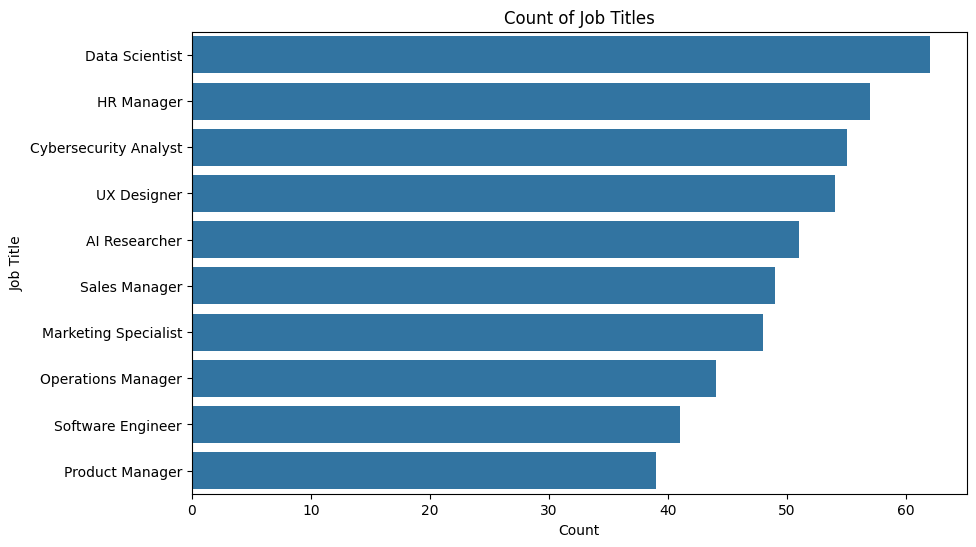

In [12]:
plt.figure(figsize=(10, 6))  
sns.countplot(y='Job_Title', data=df, order=df['Job_Title'].value_counts().index)

plt.title('Count of Job Titles')
plt.xlabel('Count')
plt.ylabel('Job Title')

plt.show()

In [13]:
df.Industry.unique()

array(['Entertainment', 'Technology', 'Retail', 'Education', 'Finance',
       'Transportation', 'Telecommunications', 'Manufacturing',
       'Healthcare', 'Energy'], dtype=object)

In [14]:
df.Industry.value_counts().sort_values(ascending=False)

Industry
Manufacturing         58
Education             57
Technology            56
Telecommunications    53
Finance               53
Energy                49
Entertainment         47
Retail                46
Healthcare            42
Transportation        39
Name: count, dtype: int64

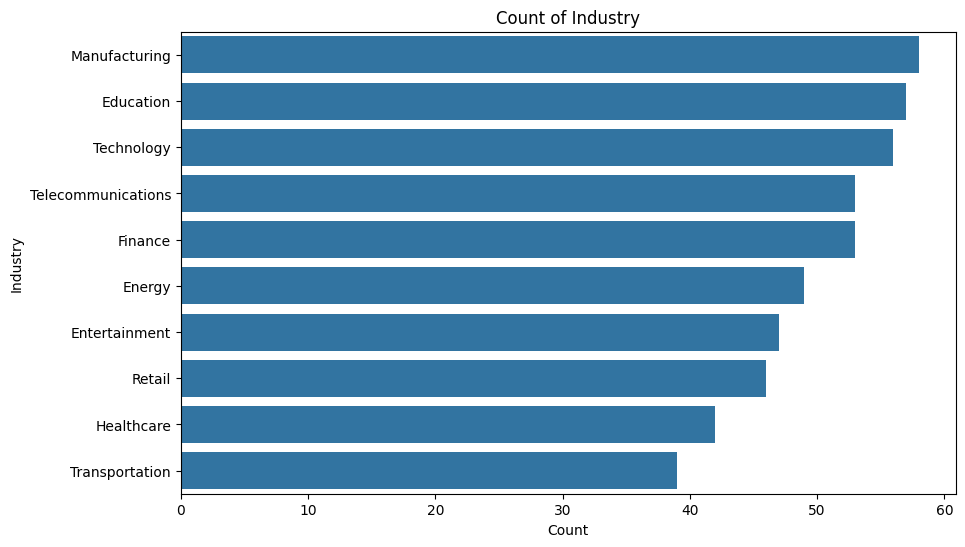

In [15]:
plt.figure(figsize=(10, 6))  
sns.countplot(y='Industry', data=df, order=df['Industry'].value_counts().index)

plt.title('Count of Industry')
plt.xlabel('Count')
plt.ylabel('Industry')

plt.show()

In [16]:
df.Company_Size.unique()

array(['Small', 'Large', 'Medium'], dtype=object)

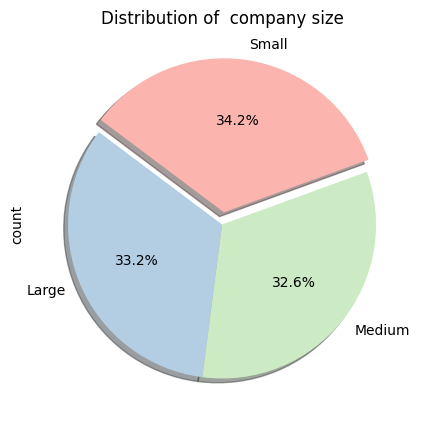

In [17]:
colors = plt.get_cmap('Pastel1').colors
df["Company_Size"].value_counts().plot(kind='pie', startangle=20 ,autopct='%1.1f%%', figsize=(5,5), title='Distribution of  company size', explode=(0.08,0,0 ) , shadow=True , colors=colors)
plt.show()

In [18]:
df.groupby("Company_Size")["Job_Title"].value_counts().unstack()

Job_Title,AI Researcher,Cybersecurity Analyst,Data Scientist,HR Manager,Marketing Specialist,Operations Manager,Product Manager,Sales Manager,Software Engineer,UX Designer
Company_Size,,,,,,,,,,
Large,16,20,23,20,15,13,16,16,12,15
Medium,21,16,17,20,20,12,11,16,13,17
Small,14,19,22,17,13,19,12,17,16,22


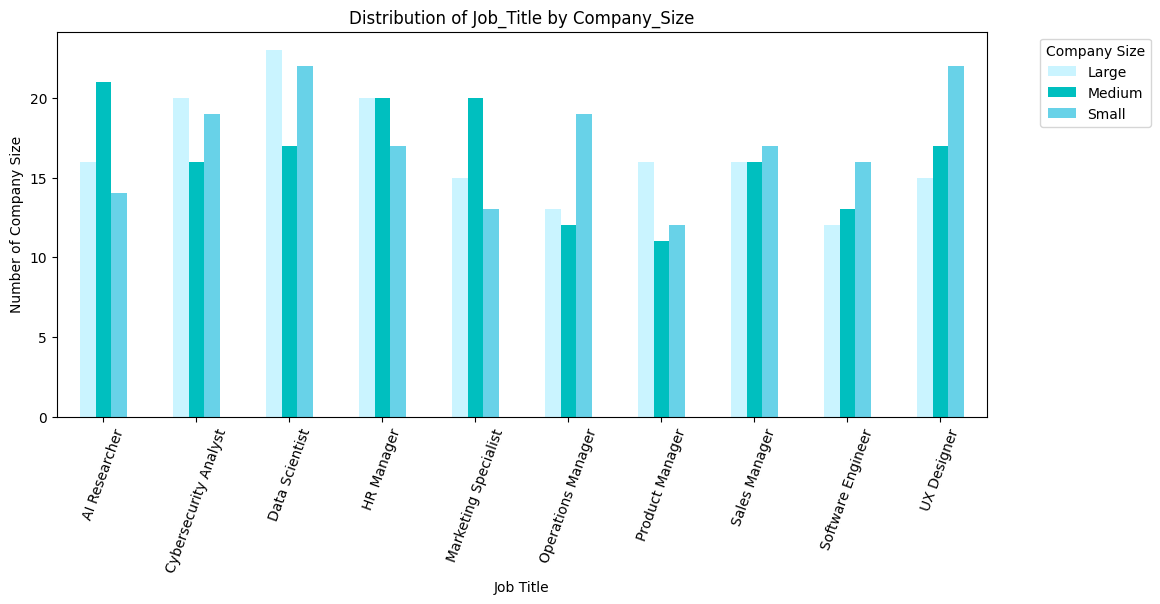

In [19]:
subject_counts = df.groupby(["Job_Title", "Company_Size"]).size().unstack()

palette = sns.color_palette("Pastel1")
subject_counts.plot(kind='bar', figsize=(12, 5), color=["#CAF4FF" ,"c"  ,"#68D2E8"])

plt.title('Distribution of Job_Title by Company_Size')
plt.xlabel('Job Title')
plt.ylabel('Number of Company Size')
plt.xticks(rotation=70)
plt.legend(title='Company Size', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

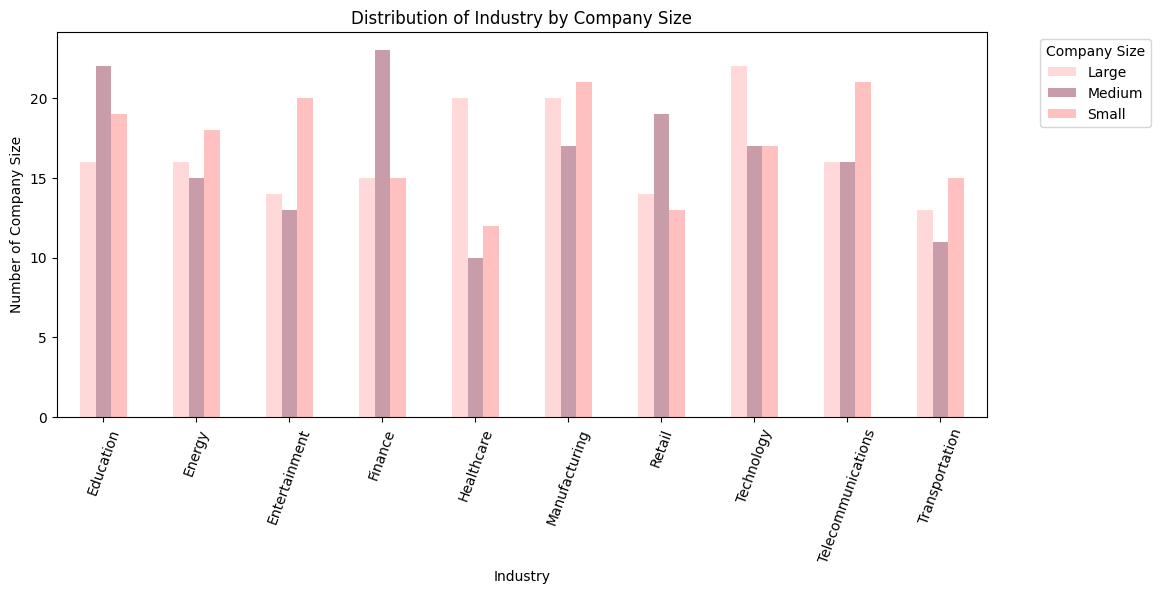

In [20]:
subject_counts = df.groupby(["Industry", "Company_Size"]).size().unstack()

palette = sns.color_palette("Set1")
subject_counts.plot(kind='bar', figsize=(12, 5), color=["#FFD0D0", "#BB8493", "#FFB1B1"] ,alpha=0.8)

plt.title('Distribution of Industry by Company Size')
plt.xlabel('Industry')
plt.ylabel('Number of Company Size')
plt.xticks(rotation=70)
plt.legend(title='Company Size', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

In [21]:
df.Location.unique()

array(['Dubai', 'Singapore', 'Berlin', 'Tokyo', 'San Francisco', 'London',
       'Paris', 'Sydney', 'New York', 'Toronto'], dtype=object)

In [22]:
df.groupby("Company_Size")["Location"].value_counts().unstack()

Location,Berlin,Dubai,London,New York,Paris,San Francisco,Singapore,Sydney,Tokyo,Toronto
Company_Size,,,,,,,,,,
Large,18,13,14,19,15,18,17,14,19,19
Medium,19,17,15,11,14,19,20,20,14,14
Small,11,21,17,19,17,25,17,18,18,8


In [23]:
df.groupby("Job_Title")["Location"].value_counts().unstack()

Location,Berlin,Dubai,London,New York,Paris,San Francisco,Singapore,Sydney,Tokyo,Toronto
Job_Title,,,,,,,,,,
AI Researcher,2,3,3,6,2,10,8,5,5,7
Cybersecurity Analyst,7,9,8,6,4,4,3,7,3,4
Data Scientist,7,6,5,8,4,6,5,8,8,5
HR Manager,5,4,8,6,8,7,6,3,5,5
Marketing Specialist,6,5,4,2,6,9,6,3,6,1
Operations Manager,7,6,5,4,2,7,4,4,4,1
Product Manager,4,2,3,2,4,6,3,5,5,5
Sales Manager,5,3,6,3,5,5,7,5,3,7
Software Engineer,2,5,3,5,4,3,6,6,5,2


In [24]:
df.groupby("Industry")["Location"].value_counts().unstack()

Location,Berlin,Dubai,London,New York,Paris,San Francisco,Singapore,Sydney,Tokyo,Toronto
Industry,,,,,,,,,,
Education,6,4,6,7,5,6,6,5,7,5
Energy,6,5,3,6,3,6,9,4,3,4
Entertainment,6,3,3,5,4,3,9,5,7,2
Finance,1,4,4,3,5,12,6,3,8,7
Healthcare,5,7,4,1,9,4,2,6,3,1
Manufacturing,4,5,8,7,8,6,4,8,6,2
Retail,5,5,4,5,2,6,3,7,5,4
Technology,5,5,5,6,4,8,7,5,5,6
Telecommunications,8,7,6,7,1,5,3,6,5,5


In [25]:
df.AI_Adoption_Level.unique()

array(['Medium', 'Low', 'High'], dtype=object)

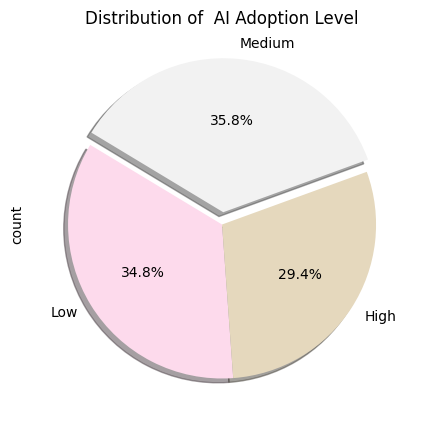

In [26]:
colors = plt.get_cmap('Pastel1_r').colors
df["AI_Adoption_Level"].value_counts().plot(kind='pie', startangle=20 ,autopct='%1.1f%%', figsize=(5,5), title='Distribution of  AI Adoption Level', explode=(0.08,0,0 ) , shadow=True , colors=colors)
plt.show()

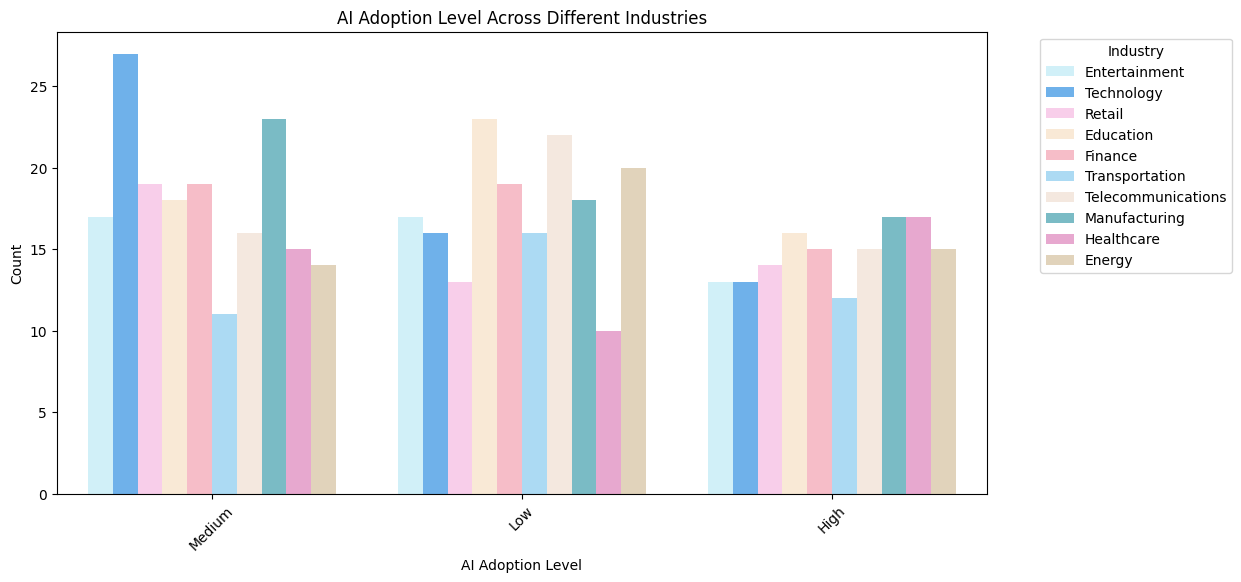

In [27]:
colors = ["#CAF4FF", "#5AB2FF","#FFC7ED" ,"#FFE9D0" ,"#FFB4C2","#A0DEFF" ,"#F7E7DC" ,"#6DC5D1" ,"#F19ED2","#E7D4B5"]

plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='AI_Adoption_Level', hue='Industry', palette=colors)
plt.title('AI Adoption Level Across Different Industries')
plt.xlabel('AI Adoption Level')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Industry', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

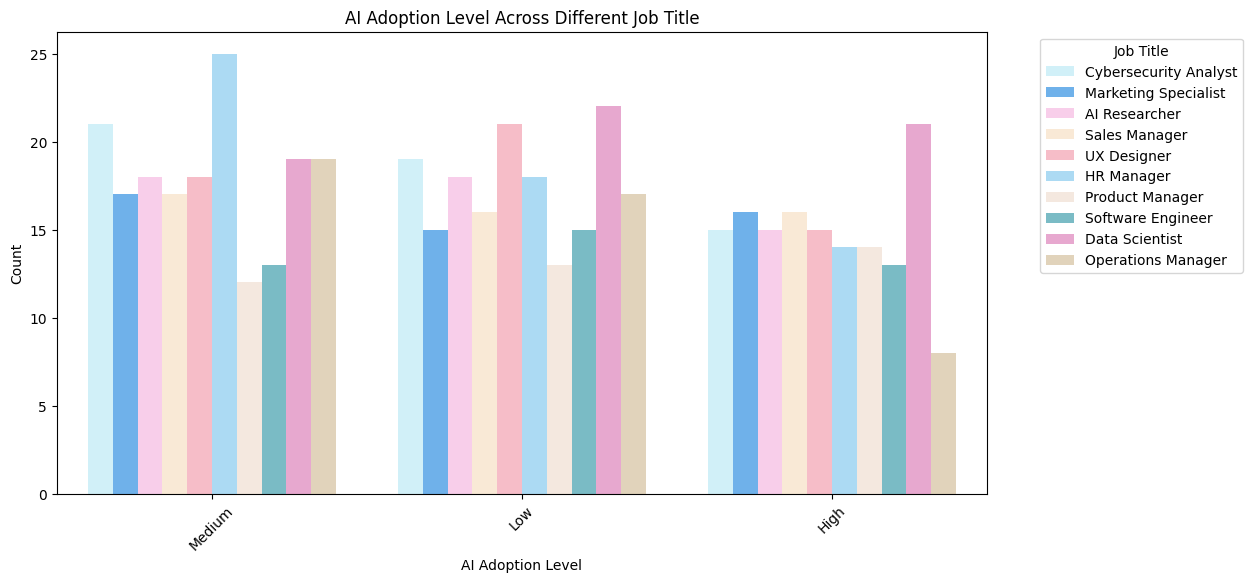

In [28]:
colors = ["#CAF4FF", "#5AB2FF","#FFC7ED" ,"#FFE9D0" ,"#FFB4C2","#A0DEFF" ,"#F7E7DC" ,"#6DC5D1" ,"#F19ED2","#E7D4B5"]

plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='AI_Adoption_Level', hue='Job_Title', palette=colors)
plt.title('AI Adoption Level Across Different Job Title')
plt.xlabel('AI Adoption Level')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Job Title', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

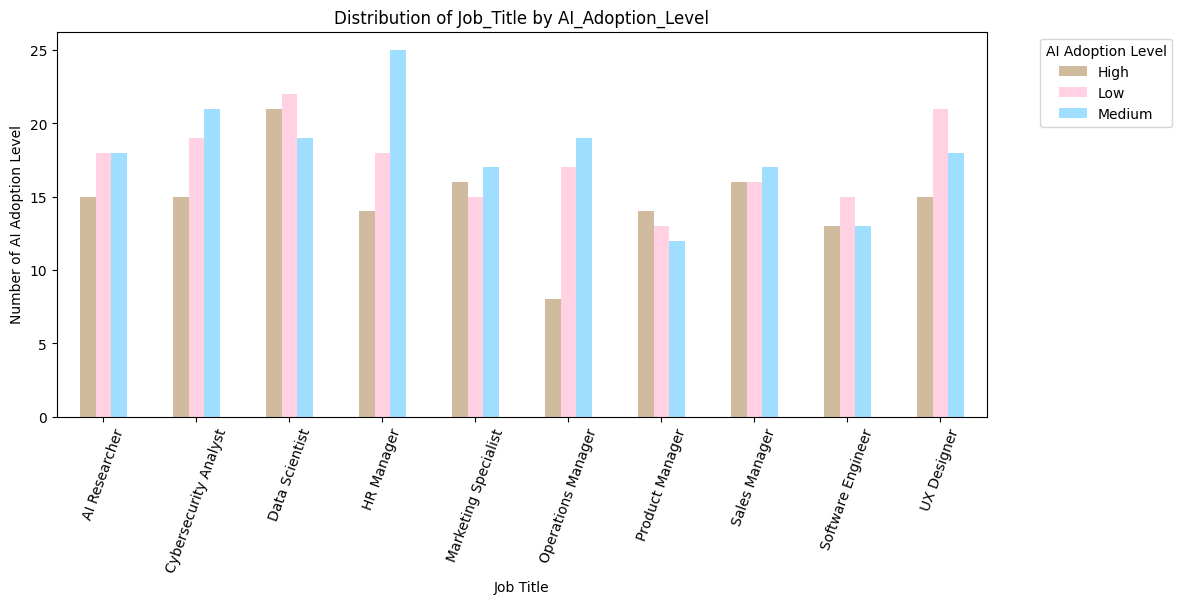

In [29]:
subject_counts = df.groupby(["Job_Title", "AI_Adoption_Level"]).size().unstack()

palette = sns.color_palette("Pastel1")
subject_counts.plot(kind='bar', figsize=(12, 5), color=[ "#D1BB9E", "#FFD1E3", "#A0DEFF"])

plt.title('Distribution of Job_Title by AI_Adoption_Level')
plt.xlabel('Job Title')
plt.ylabel('Number of AI Adoption Level')
plt.xticks(rotation=70)
plt.legend(title='AI Adoption Level', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

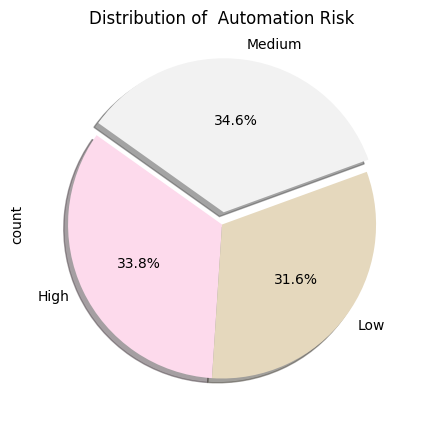

In [30]:
colors = plt.get_cmap('Pastel1_r').colors
df["Automation_Risk"].value_counts().plot(kind='pie', startangle=20 ,autopct='%1.1f%%', figsize=(5,5), title='Distribution of  Automation Risk', explode=(0.08,0,0 ) , shadow=True , colors=colors)
plt.show()

In [31]:
df.groupby(["Automation_Risk", "AI_Adoption_Level"]).size().unstack()

AI_Adoption_Level,High,Low,Medium
Automation_Risk,,,
High,48,53,68
Low,43,61,54
Medium,56,60,57
